In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:

path = r"C:\Users\abarr\Desktop\ironhack\week5\labs\amz_uk_price_prediction_dataset.csv"
amazon_data = pd.read_csv(path)
amazon = pd.DataFrame(amazon_data)

In [4]:
amazon.shape

(2443651, 9)

In [5]:
amazon.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [6]:
crosstab = pd.crosstab(amazon["category"], amazon["isBestSeller"])#.reset_index()
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
crosstab[True]

category
3D Printers                         1
3D Printing & Scanning              2
Abrasive & Finishing Products       5
Action Cameras                      1
Adapters                            3
                                 ... 
Wind Instruments                    7
Window Treatments                   5
Women                             213
Women's Sports & Outdoor Shoes     20
eBook Readers & Accessories         0
Name: True, Length: 296, dtype: int64

In [8]:
crosstab['proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
#[column for column in crosstab.columns if column == [True, False] "isBestSeller_"]
crosstab.sort_values("proportion", ascending=False)

# the categories where Best Sellers are more common are "Grocery", "Smart Home Security & Lighting" and "Health & Personal Care" 

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


In [9]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(amazon["category"], amazon["isBestSeller"])
chi2_contingency(crosstab)[1]

# p-value is 0.0 < 0.05  this suggests that there is a significant association between both variables

np.float64(0.0)

In [10]:
from scipy.stats.contingency import association

association(crosstab, method = "cramer")
# the value of ~0.12 indicates a small association between the two variables

0.1222829439760564

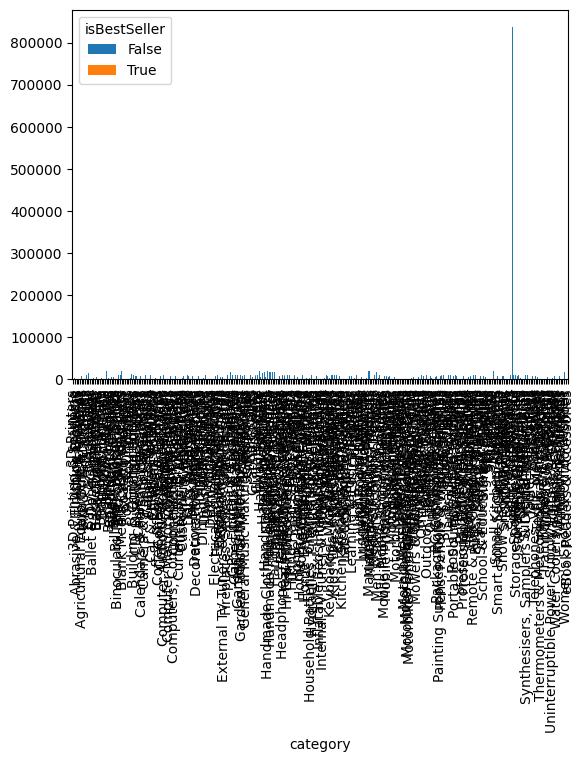

<Figure size 1000x2e+06 with 0 Axes>

In [11]:
crosstab.plot(kind="bar", stacked=True)
plt.figure(figsize=(10, 20000))
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [12]:
#0. 
Q1 = amazon['price'].quantile(0.25)
Q3 = amazon['price'].quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
#outliers = data[(data < lower_bound) | (data > upper_bound)]

#remove the outliers from the df
amazon_no_outliers = amazon[(amazon['price'] > lower_bound) & (amazon['price'] < upper_bound)]
amazon_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [13]:
#1.
top20_cat = amazon_no_outliers['price'].groupby(amazon_no_outliers['category']).count().sort_values(ascending=False).nlargest(20)
top20_cat

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: price

In [14]:
amazon_top20 = amazon_no_outliers[amazon_no_outliers['category'].isin(top20_cat.index)]

C:\Users\abarr\AppData\Local\Temp\ipykernel_9960\391760651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = amazon_top20, x = "price", y="category", palette = "coolwarm")


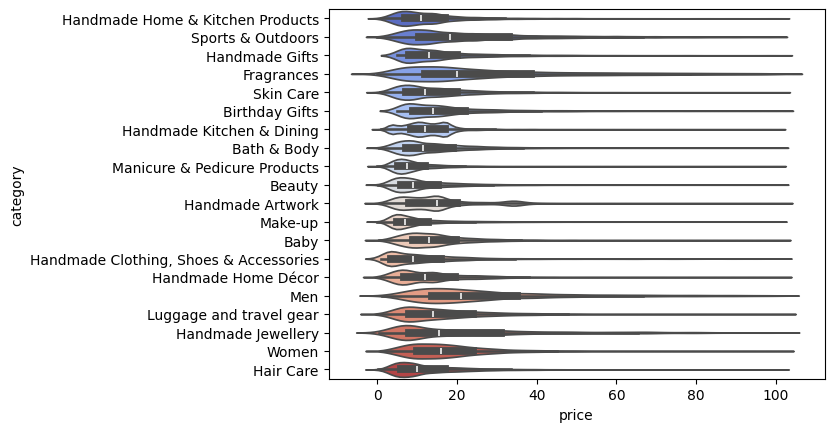

<Figure size 1500x800 with 0 Axes>

In [15]:
sns.violinplot(data = amazon_top20, x = "price", y="category", palette = "coolwarm")
plt.figure(figsize=(15, 8))
plt.show()

#highest median price appears to be in the categories "Fragrances", "Men" and "Women"

In [16]:
top10_cat = amazon_no_outliers['price'].groupby(amazon_no_outliers['category']).count().sort_values(ascending=False).nlargest(10)
amazon_top10 = amazon_no_outliers[amazon_no_outliers['category'].isin(top10_cat.index)]

C:\Users\abarr\AppData\Local\Temp\ipykernel_9960\1129606456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = amazon_top10, x="price", y="category", palette = "cubehelix", errorbar=None, estimator= "mean")


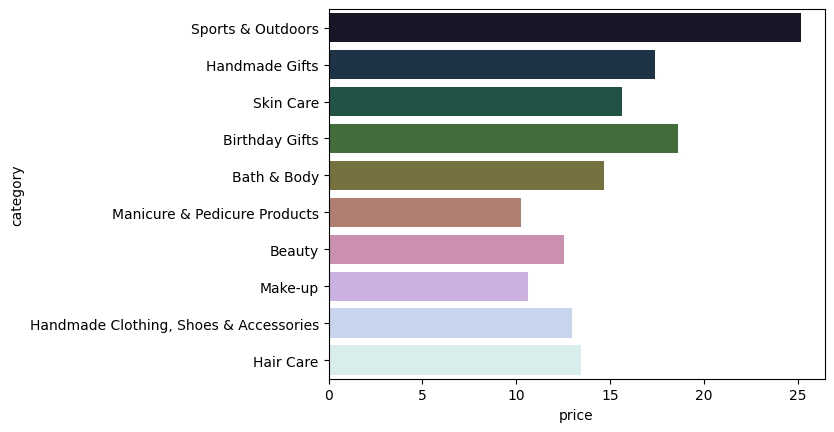

In [17]:
sns.barplot(data = amazon_top10, x="price", y="category", palette = "cubehelix", errorbar=None, estimator= "mean")
plt.show()

#highest average price is in the category "Sports & Outdoors"

C:\Users\abarr\AppData\Local\Temp\ipykernel_9960\2780931267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = amazon_top10, x="stars", y="category", palette = "Spectral")


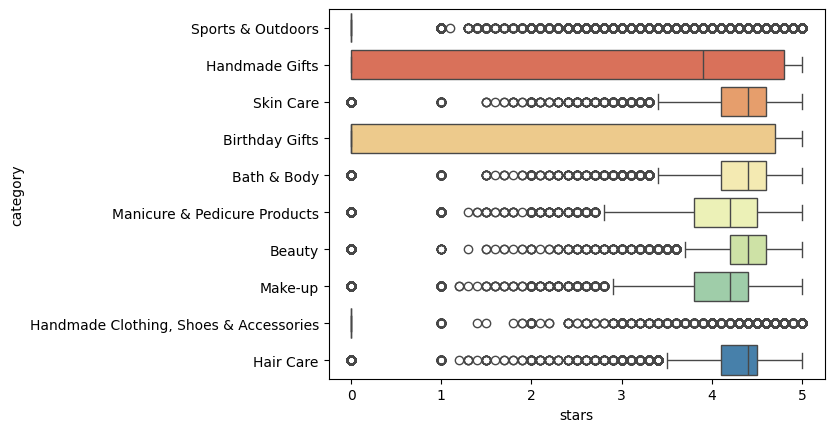

In [18]:
#3.
sns.boxplot(data = amazon_top10, x="stars", y="category", palette = "Spectral")
plt.show()

#highest median rating is in the category "Skin care"

### Part 3: Investigating the Interplay Between Product Prices and Ratings

In [19]:
amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
amazon["price"].corr(amazon["stars"])
# pearson correlation is -0.125, which indicates a weak negative correlation between price and stars
# meaning that the higher the price, the lower the rating

np.float64(-0.12490673262148386)

In [ ]:
amazon["price"].corr(amazon["stars"], method = "spearman")
# spearman correlation is -0.133, which indicates a weak negative correlation between price and stars
# meaning that the higher the price, the lower the rating

np.float64(-0.13316425462433876)

In [ ]:
#Is there a significant correlation between product price and its rating?

Object `rating` not found.


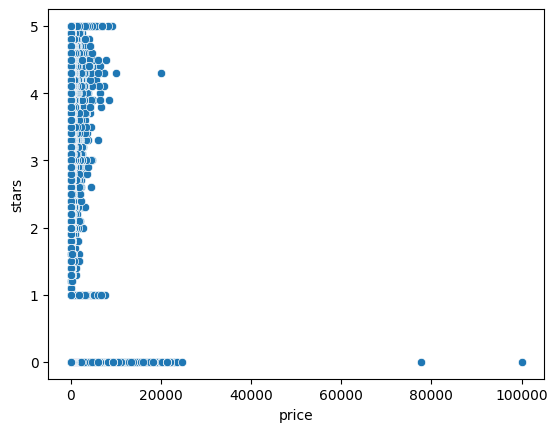

In [24]:
sns.scatterplot(data = amazon, x = "price", y="stars")
plt.show()

In [29]:
amazon.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [30]:
potencial_categorical = amazon.select_dtypes("number").loc[:,amazon.select_dtypes("number").nunique() < 20]

amazon_categorical = pd.concat([amazon.select_dtypes("object"), potencial_categorical] ,axis=1)
display(amazon_categorical.head())


amazon_numerical = amazon.select_dtypes("number").drop(columns = potencial_categorical.columns)
display(amazon_numerical.head())

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers


,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [ ]:
#amazon_numerical = amazon[amazon.columns.isin(amazon.dtypes == )]

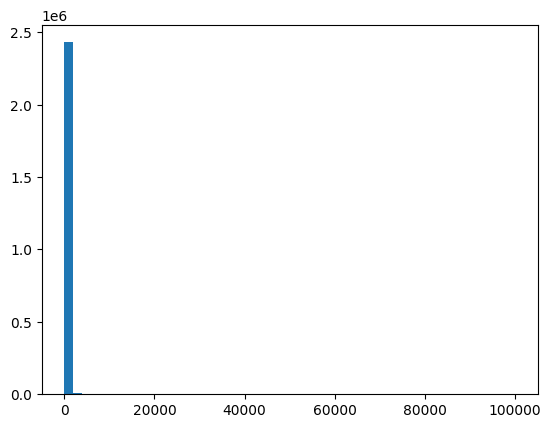

In [28]:
plt.hist(amazon["price"], bins = 50)
plt.show()

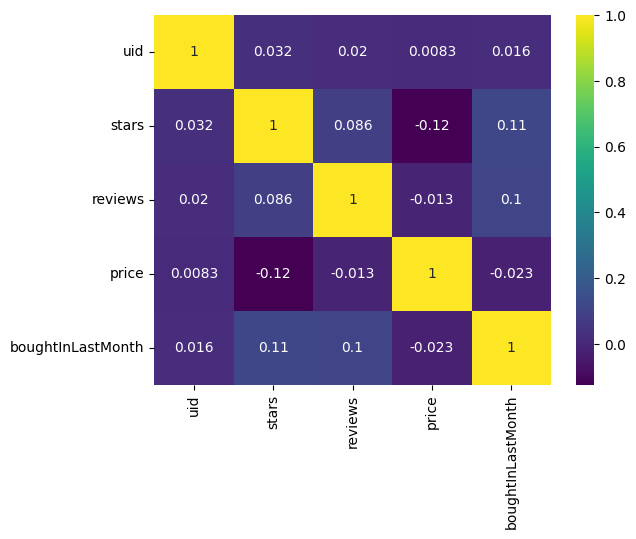

In [32]:
corr_matrix = amazon_numerical.corr()

#plt.figure(figsize = (18,15))

sns.heatmap(corr_matrix, annot = True, cmap = "viridis")
plt.show()

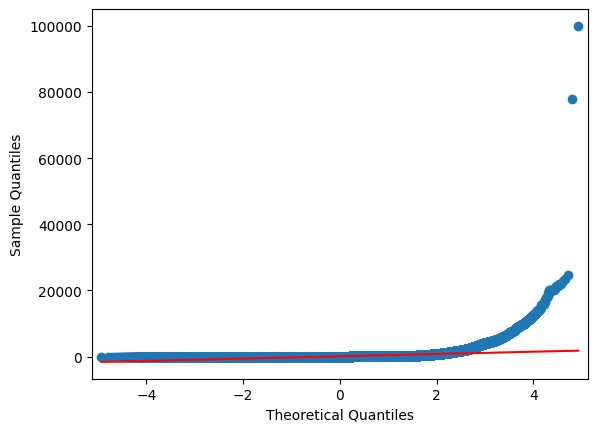

In [ ]:
import statsmodels.api as sm

sm.qqplot(amazon["price"], line = "s")
plt.show()

# most prices are over a normal distribution but, as seen in the histogram, in the previous lab there are a lot of outliers in the far right end of the expectrum of the price that make it hard to call a normal distribution.
# not a normal distribution, due to the high number of outliers